Instalar los paquetes necesarios, ejecutar solo al principio.

In [1]:
# üì¶ Instalar paquetes necesarios
%pip install pandas numpy pyarrow matplotlib seaborn plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# üì¶ Imports principales para an√°lisis de datos y visualizaci√≥n

# Carga y manipulaci√≥n de datos
import pandas as pd       # type: ignore # Manipulaci√≥n y an√°lisis de datos tabulares
import numpy as np        # type: ignore # Operaciones num√©ricas (opcional, pero √∫til)

# Lectura de archivos Parquet
import pyarrow.parquet as pq  # type: ignore # Backend recomendado para parquet (alternativa: fastparquet)

# Visualizaci√≥n b√°sica y exploratoria
import matplotlib.pyplot as plt      # type: ignore # Visualizaciones est√°ndar (histogramas, scatter, etc.)
import seaborn as sns                # type: ignore # Visualizaci√≥n estad√≠stica avanzada (heatmaps, countplots)

# Visualizaci√≥n avanzada 
import plotly.express as px         # type: ignore # Visualizaciones interactivas (incl. Sankey, mapas, etc.)
import plotly.graph_objects as go # type: ignore # Gr√°ficos m√°s complejos y personalizados

# Configuraci√≥n general de visualizaciones
plt.style.use('seaborn-v0_8')        # Estilo visual est√°ndar
# %matplotlib inline                   # Para visualizar directamente en el notebook


Importaci√≥n de los ficheros parquet

In [3]:
# Fuente de datos directa
# https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# Ruta base de trip-data
data_path = "https://d37ci6vzurychx.cloudfront.net/trip-data/"

# Ficheros Parquet para febrero de 2025
yellow_path_2025_02 = data_path + "yellow_tripdata_2025-02.parquet"
green_path_2025_02 = data_path + "green_tripdata_2025-02.parquet"
fhv_path_2025_02 = data_path + "fhv_tripdata_2025-02.parquet"
fhvhv_path_2025_02 = data_path + "fhvhv_tripdata_2025-02.parquet"

# Ficheros Parquet para diciembre de 2025
yellow_path_2024_12 = data_path + "yellow_tripdata_2024-12.parquet"
green_path_2024_12 = data_path + "green_tripdata_2024-12.parquet"
fhv_path_2024_12 = data_path + "fhv_tripdata_2024-12.parquet"
fhvhv_path_2024_12 = data_path + "fhvhv_tripdata_2024-12.parquet"



Carga de los ficheros Parquet en Datasets de Febrero 2025

In [4]:
# Cargamos cada fichero Parquet de Febrero 2025
yellow_df_2025_02 = pd.read_parquet(yellow_path_2025_02, engine="pyarrow")
green_df_2025_02 = pd.read_parquet(green_path_2025_02, engine="pyarrow")
fhv_df_2025_02 = pd.read_parquet(fhv_path_2025_02, engine="pyarrow")
fhvhv_df_2025_02 = pd.read_parquet(fhvhv_path_2025_02, engine="pyarrow")


Verificaci√≥n de la carga de los datasets de Febrero 2025

In [16]:
# Mostramos el n√∫mero de filas y columnas de cada dataset de Febrero 2025
for name, df in zip(["Yellow", "Green", "FHV", "FHVHV"],
                    [yellow_df_2025_02, green_df_2025_02, fhv_df_2025_02, fhvhv_df_2025_02]):
    print(f"{name} Cabs February 2025: {df.shape[0]:,} filas, {df.shape[1]} columnas")

Yellow Cabs February 2025: 3,577,543 filas, 21 columnas
Green Cabs February 2025: 46,621 filas, 21 columnas
FHV Cabs February 2025: 1,578,722 filas, 7 columnas
FHVHV Cabs February 2025: 19,339,461 filas, 25 columnas


Carga de los ficheros Parquet en Datasets de Diciembre 2024

In [6]:
# Cargamos cada fichero Parquet de Diciembre 2024
yellow_df_2024_12 = pd.read_parquet(yellow_path_2024_12, engine="pyarrow")
green_df_2024_12 = pd.read_parquet(green_path_2024_12, engine="pyarrow")
fhv_df_2024_12 = pd.read_parquet(fhv_path_2024_12, engine="pyarrow")
fhvhv_df_2024_12 = pd.read_parquet(fhvhv_path_2024_12, engine="pyarrow")

Verificaci√≥n de la carga de los datasets de Diciembre 2025

In [7]:
# Mostramos el n√∫mero de filas y columnas de cada dataset de Diciembre 2024
for name, df in zip(["Yellow", "Green", "FHV", "FHVHV"],
                    [yellow_df_2024_12, green_df_2024_12, fhv_df_2024_12, fhvhv_df_2024_12]):
    print(f"{name} Cabs December 2024: {df.shape[0]:,} filas, {df.shape[1]} columnas")

Yellow Cabs December 2024: 3,668,371 filas, 19 columnas
Green Cabs December 2024: 53,994 filas, 20 columnas
FHV Cabs December 2024: 1,913,200 filas, 7 columnas
FHVHV Cabs December 2024: 21,068,851 filas, 24 columnas


In [8]:
# Mostrar lista de columnas y sus tipos del dataset Yellow Cabs
yellow_columns_info = pd.DataFrame({
    'Columna': yellow_df_2025_02.columns,
    'Tipo de dato': yellow_df_2025_02.dtypes.astype(str)
})

# Mostrar la tabla
yellow_columns_info


Columna    Tipo de dato
VendorID                            VendorID           int32
tpep_pickup_datetime    tpep_pickup_datetime  datetime64[us]
tpep_dropoff_datetime  tpep_dropoff_datetime  datetime64[us]
passenger_count              passenger_count         float64
trip_distance                  trip_distance         float64
RatecodeID                        RatecodeID         float64
store_and_fwd_flag        store_and_fwd_flag          object
PULocationID                    PULocationID           int32
DOLocationID                    DOLocationID           int32
payment_type                    payment_type           int64
fare_amount                      fare_amount         float64
extra                                  extra         float64
mta_tax                              mta_tax         float64
tip_amount                        tip_amount         float64
tolls_amount                    tolls_amount         float64
improvement_surcharge  improvement_surcharge         float64
total_amount                    total_amount         float64
congestion_surcharge    congestion_surcharge         float64
Airport_fee                      Airport_fee         float64
cbd_congestion_fee        cbd_congestion_fee         float64

¬øExisten valores aparentemente incorrectos?  Yellow Cabs Febrero 2025

In [9]:
# üîç An√°lisis de calidad de datos en Yellow Cabs (Febrero 2025)

def analizar_valores_invalidos(df):
    resultados = {}

    # 1. Pasajeros: 0 o valores negativos
    resultados['Pasajeros = 0 o negativos'] = df[df['passenger_count'] <= 0].shape[0]

    # 2. Distancias negativas o cero
    resultados['Distancia = 0 o negativa'] = df[df['trip_distance'] <= 0].shape[0]

    # 3. Duraci√≥n del viaje (dropoff < pickup)
    resultados['Dropoff antes de Pickup'] = df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']].shape[0]

    # 4. Duraci√≥n = 0 (pickup == dropoff)
    resultados['Duraci√≥n = 0 min'] = df[df['tpep_pickup_datetime'] == df['tpep_dropoff_datetime']].shape[0]

    # 5. Total_amount negativo o cero
    if 'total_amount' in df.columns:
        resultados['Total = 0 o negativo'] = df[df['total_amount'] <= 0].shape[0]

    # 6. Ubicaciones nulas o fuera de rango (ID de zona entre 1 y 263 seg√∫n TLC)
    resultados['PULocationID inv√°lido'] = df[~df['PULocationID'].between(1, 263)].shape[0]
    resultados['DOLocationID inv√°lido'] = df[~df['DOLocationID'].between(1, 263)].shape[0]

    return pd.DataFrame.from_dict(resultados, orient='index', columns=['N¬∫ de registros'])

# Ejecutamos el an√°lisis en el dataset de Yellow Cabs
analisis_yellow = analizar_valores_invalidos(yellow_df_2025_02)
analisis_yellow


N¬∫ de registros
Pasajeros = 0 o negativos            21751
Distancia = 0 o negativa             99771
Dropoff antes de Pickup                 93
Duraci√≥n = 0 min                      5071
Total = 0 o negativo                 55621
PULocationID inv√°lido                 8635
DOLocationID inv√°lido                21285

Gr√°fico combinado para representar de forma clara y visual los outliers en las variables m√°s propensas a errores

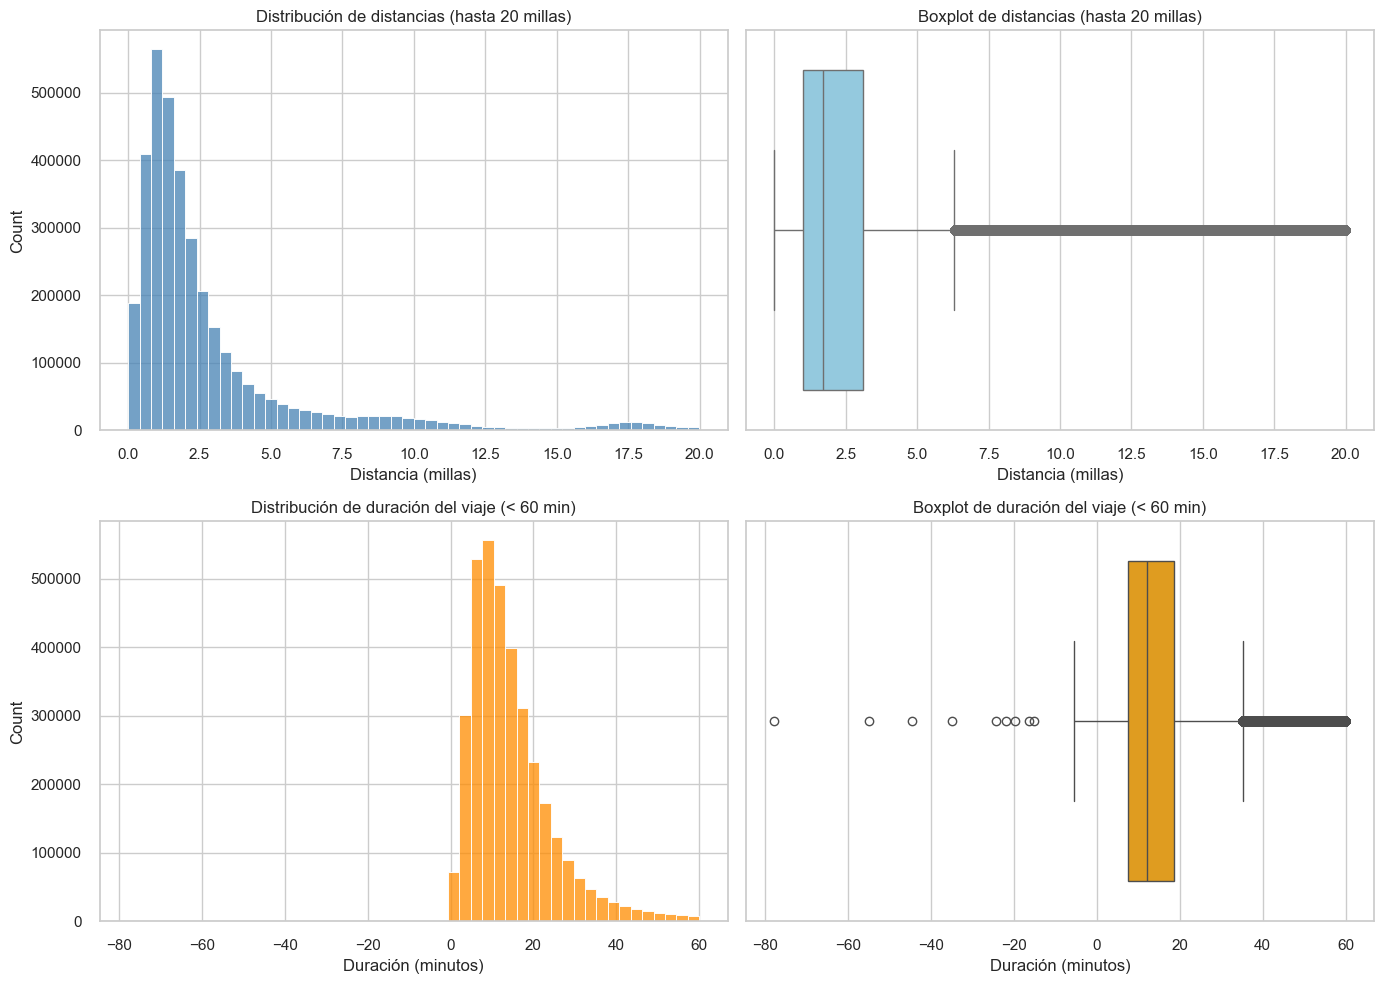

In [10]:
# Configuraci√≥n general del estilo
sns.set(style="whitegrid")

# Figura con dos subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histograma de distancias (m√°x. 20 millas para enfocar la visualizaci√≥n)
sns.histplot(yellow_df_2025_02[yellow_df_2025_02["trip_distance"] < 20]["trip_distance"], 
             bins=50, kde=False, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title("Distribuci√≥n de distancias (hasta 20 millas)")
axs[0, 0].set_xlabel("Distancia (millas)")

# 2. Boxplot de distancias
sns.boxplot(x=yellow_df_2025_02[yellow_df_2025_02["trip_distance"] < 20]["trip_distance"], 
            ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title("Boxplot de distancias (hasta 20 millas)")
axs[0, 1].set_xlabel("Distancia (millas)")

# 3. Histograma de duraci√≥n del trayecto (en minutos)
yellow_df_2025_02["trip_duration_min"] = (yellow_df_2025_02["tpep_dropoff_datetime"] - yellow_df_2025_02["tpep_pickup_datetime"]).dt.total_seconds() / 60
sns.histplot(yellow_df_2025_02[yellow_df_2025_02["trip_duration_min"] < 60]["trip_duration_min"], 
             bins=50, kde=False, ax=axs[1, 0], color='darkorange')
axs[1, 0].set_title("Distribuci√≥n de duraci√≥n del viaje (< 60 min)")
axs[1, 0].set_xlabel("Duraci√≥n (minutos)")

# 4. Boxplot de duraci√≥n
sns.boxplot(x=yellow_df_2025_02[yellow_df_2025_02["trip_duration_min"] < 60]["trip_duration_min"], 
            ax=axs[1, 1], color='orange')
axs[1, 1].set_title("Boxplot de duraci√≥n del viaje (< 60 min)")
axs[1, 1].set_xlabel("Duraci√≥n (minutos)")

# Ajustar espacio
plt.tight_layout()
plt.show()


Visualizaci√≥n de trayectos entre las 20 zonas m√°s activas

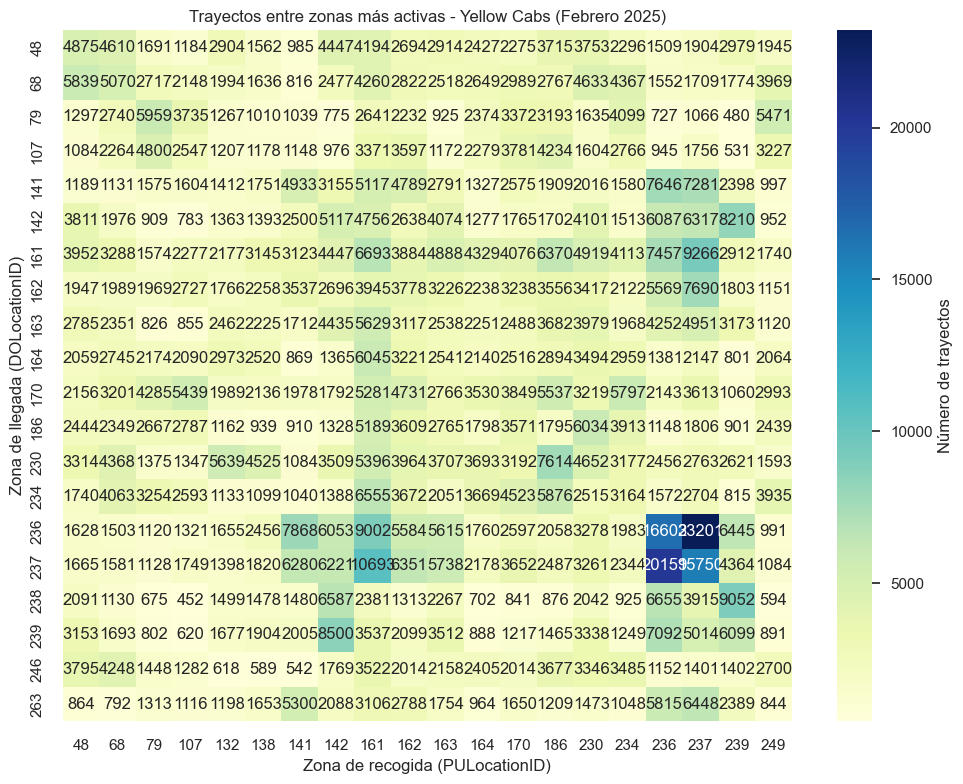

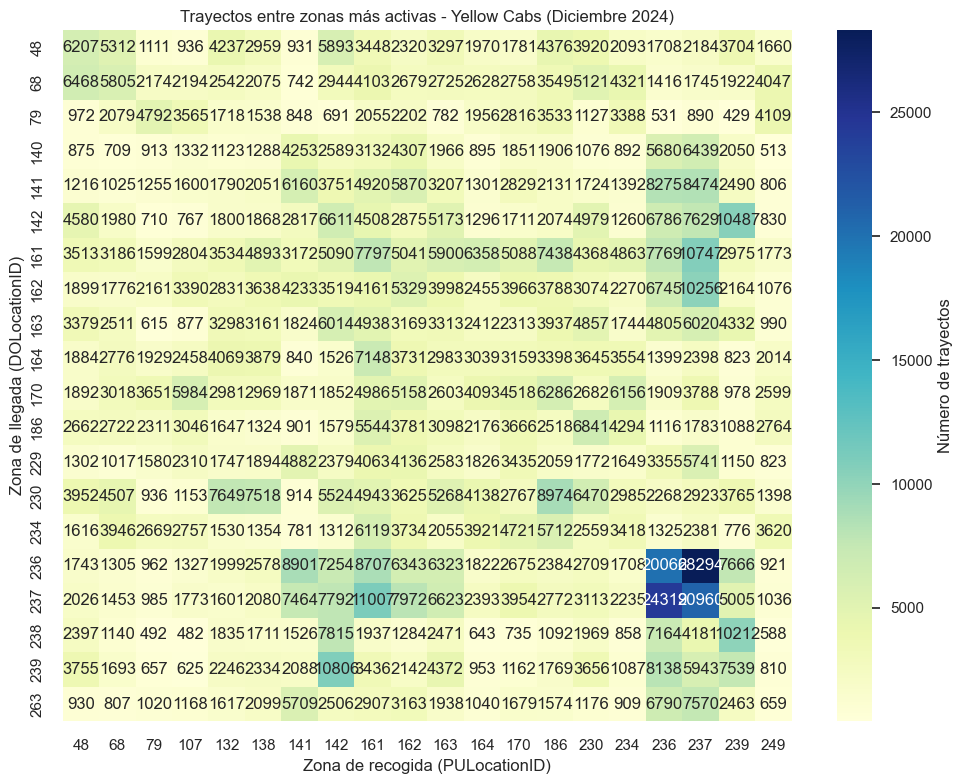

In [17]:
def plot_top_zones_heatmap(df, nombre_dataset, mes_label, top_n=20):
    """
    Genera un heatmap de trayectos entre las zonas m√°s activas (recogida y destino).

    Par√°metros:
    - df: DataFrame de viajes (con columnas PULocationID y DOLocationID)
    - nombre_dataset: nombre del dataset (ej. 'Yellow Cabs')
    - mes_label: etiqueta del mes (ej. 'Febrero 2025')
    - top_n: n√∫mero de zonas m√°s activas a considerar
    """

    # Agrupamos y contamos trayectos por combinaci√≥n de zonas
    zonas = df.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='count')

    # Zonas m√°s frecuentes en recogida y destino
    top_pickup = zonas.groupby('PULocationID')['count'].sum().nlargest(top_n).index
    top_dropoff = zonas.groupby('DOLocationID')['count'].sum().nlargest(top_n).index

    # Filtramos combinaciones entre esas zonas
    zonas_top = zonas[
        zonas['PULocationID'].isin(top_pickup) &
        zonas['DOLocationID'].isin(top_dropoff)
    ]

    # Creamos la matriz pivot para heatmap
    pivot = zonas_top.pivot(index='DOLocationID', columns='PULocationID', values='count').fillna(0)

    # Graficamos
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'N√∫mero de trayectos'})
    plt.title(f'Trayectos entre zonas m√°s activas - {nombre_dataset} ({mes_label})')
    plt.xlabel('Zona de recogida (PULocationID)')
    plt.ylabel('Zona de llegada (DOLocationID)')
    plt.tight_layout()
    plt.show()

# Generamos heatmaps para los datasets de Febrero 2025 y Diciembre 2024
plot_top_zones_heatmap(yellow_df_2025_02, "Yellow Cabs", "Febrero 2025")
plot_top_zones_heatmap(yellow_df_2024_12, "Yellow Cabs", "Diciembre 2024")
plot_top_zones_heatmap(green_df_2025_02, "Green Cabs", "Febrero 2025")
plot_top_zones_heatmap(green_df_2024_12, "Green Cabs", "Diciembre 2024")



Visualizaci√≥n de trayectos entre las 5 zonas m√°s populares

In [ ]:
# Funci√≥n para generar un diagrama de Sankey con las 5 zonas m√°s populares

def plot_sankey_top5(df, nombre_dataset, mes_label):
    """
    Diagrama de Sankey con las 5 zonas m√°s populares (origen + destino),
    usando etiquetas combinadas con ID y nombre de zona.
    """

    # Cargar nombres de zona
    url_lookup = "https://raw.githubusercontent.com/renerubio/NYC-TAXI/refs/heads/main/taxi_zone_lookup.csv"
    taxi_zones = pd.read_csv(url_lookup)
    zona_nombres = taxi_zones.set_index("LocationID")["Zone"].to_dict()

    # Agrupar trayectos entre zonas
    zonas = df.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='count')

    # Obtener top 5 zonas m√°s activas
    zonas_frecuentes = pd.concat([
        zonas.groupby('PULocationID')['count'].sum(),
        zonas.groupby('DOLocationID')['count'].sum()
    ]).groupby(level=0).sum().nlargest(5).index.tolist()

    # Filtrar trayectos entre esas zonas
    zonas_top5 = zonas[
        zonas['PULocationID'].isin(zonas_frecuentes) &
        zonas['DOLocationID'].isin(zonas_frecuentes)
    ]

    # Crear etiquetas como "[ID] Nombre"
    etiquetas = [f"{z} - {zona_nombres.get(z, 'Desconocido')}" for z in zonas_frecuentes]
    zona_idx = {zona: i for i, zona in enumerate(zonas_frecuentes)}

    # Mapear source, target, value
    source = zonas_top5['PULocationID'].map(zona_idx).tolist()
    target = zonas_top5['DOLocationID'].map(zona_idx).tolist()
    value = zonas_top5['count'].tolist()

    # Crear Sankey
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15, thickness=20,
            line=dict(color="black", width=0.5),
            label=etiquetas
        ),
        link=dict(source=source, target=target, value=value)
    )])

    fig.update_layout(
        title_text=f"Trayectos entre las 5 zonas m√°s populares ‚Äì {nombre_dataset} ({mes_label})",
        font_size=12
    )
    return fig


plot_sankey_top5(yellow_df_2025_02, "Yellow Cabs", "Febrero 2025").show()
plot_sankey_top5(yellow_df_2024_12, "Yellow Cabs", "Diciembre 2024").show()
plot_sankey_top5(green_df_2025_02, "Green Cabs", "Febrero 2025").show()
plot_sankey_top5(green_df_2024_12, "Green Cabs", "Diciembre 2024").show()



Visualizaci√≥n (heatmaps) de trayectos entre las 5 zonas m√°s populares

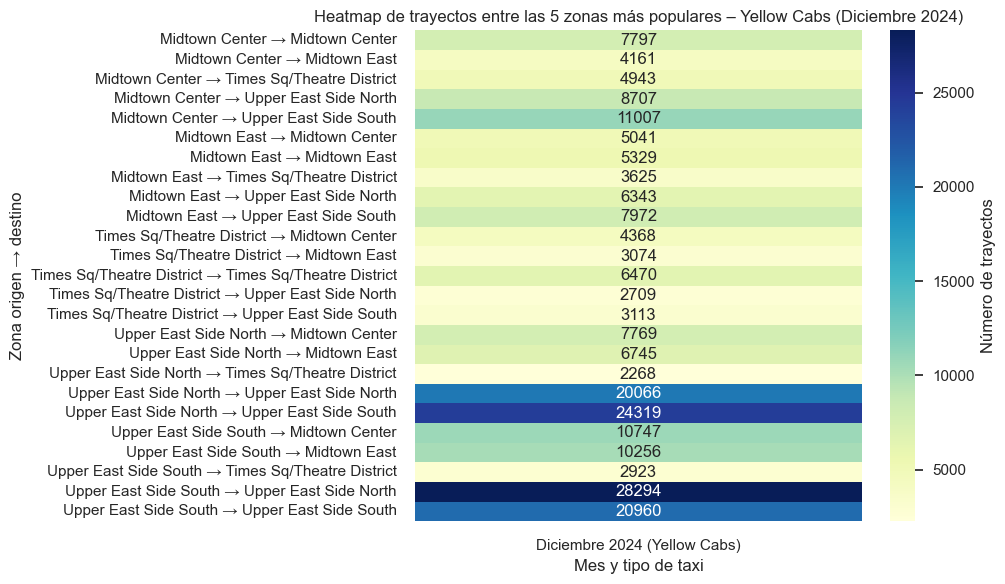

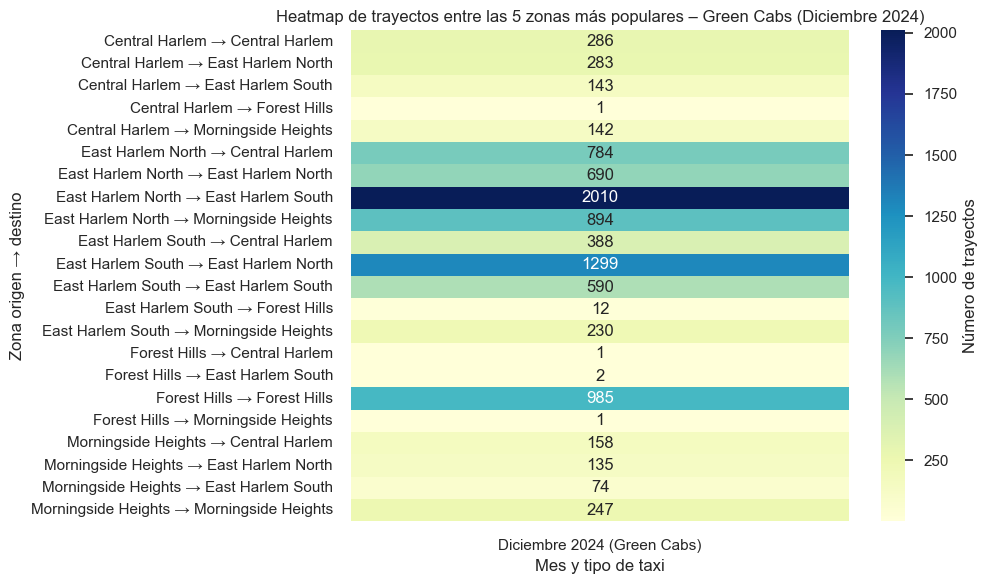

In [22]:
def plot_heatmap_top5(df, nombre_dataset, mes_label):
    """
    Genera un heatmap con los trayectos entre las 5 zonas m√°s populares (combinando origen y destino).

    Par√°metros:
    - df: DataFrame con columnas PULocationID, DOLocationID
    - nombre_dataset: nombre del dataset (ej. 'Yellow Cabs')
    - mes_label: etiqueta del mes (ej. 'Febrero 2025')
    """

    # Cargar nombres de zonas
    url_lookup = "https://raw.githubusercontent.com/renerubio/NYC-TAXI/refs/heads/main/taxi_zone_lookup.csv"
    taxi_zones = pd.read_csv(url_lookup)
    zona_nombres = taxi_zones.set_index("LocationID")["Zone"].to_dict()

    # Agrupar trayectos
    zonas = df.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='count')

    # Zonas m√°s activas (top 5 combinando origen y destino)
    zonas_frecuentes = pd.concat([
        zonas.groupby('PULocationID')['count'].sum(),
        zonas.groupby('DOLocationID')['count'].sum()
    ]).groupby(level=0).sum().nlargest(5).index.tolist()

    # Filtrar solo trayectos entre esas zonas
    zonas_top5 = zonas[
        zonas['PULocationID'].isin(zonas_frecuentes) &
        zonas['DOLocationID'].isin(zonas_frecuentes)
    ].copy()

    # Mapeo a nombres
    zonas_top5["Zona origen"] = zonas_top5["PULocationID"].map(zona_nombres)
    zonas_top5["Zona destino"] = zonas_top5["DOLocationID"].map(zona_nombres)

    # Crear √≠ndice de combinaciones origen ‚Üí destino
    zonas_top5["Zona"] = zonas_top5["Zona origen"] + " ‚Üí " + zonas_top5["Zona destino"]
    zonas_top5["Mes-Tipo"] = f"{mes_label} ({nombre_dataset})"

    # Pivot para heatmap
    pivot_df = zonas_top5.pivot(index="Zona", columns="Mes-Tipo", values="count").fillna(0)

    # Dibujar heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'N√∫mero de trayectos'})
    plt.title(f"Heatmap de trayectos entre las 5 zonas m√°s populares ‚Äì {nombre_dataset} ({mes_label})")
    plt.ylabel("Zona origen ‚Üí destino")
    plt.xlabel("Mes y tipo de taxi")
    plt.tight_layout()
    plt.show()

plot_heatmap_top5(yellow_df_2025_02, "Yellow Cabs", "Febrero 2025")
plot_heatmap_top5(yellow_df_2024_12, "Yellow Cabs", "Diciembre 2024")
plot_heatmap_top5(green_df_2025_02, "Green Cabs", "Febrero 2025")
plot_heatmap_top5(green_df_2024_12, "Green Cabs", "Diciembre 2024")